# Ridgeline plot

## Preparation


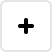
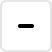
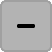
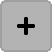
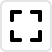
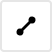
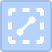
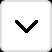
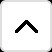
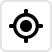

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(iris_df.shape)
iris_df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
n = 31
trig_df = pd.DataFrame({"x": np.linspace(-3 * np.pi, 3 * np.pi, n)}).assign(
    y=lambda r: 0,
    h=lambda r: np.cos(r.x),
)
print(trig_df.shape)
trig_df.head()

(31, 3)


x  y         h
0 -9.424778  0 -1.000000
1 -8.796459  0 -0.809017
2 -8.168141  0 -0.309017
3 -7.539822  0  0.309017
4 -6.911504  0  0.809017

In [5]:
n = 100
h = .2
ys = [.0, .2, .4]
loc = [0, -.5, .5]
scale = [1, 1.4, 1.2]
random_df = pd.concat([
    pd.DataFrame({"x": np.linspace((-3 + min(loc)) * s, (3 + max(loc)) * s, n)}).assign(
        h=lambda r: norm.pdf(r.x, loc=l, scale=s),
        s=lambda r: np.where(r.x >= l, 1, -1),
        y=lambda r: y,
    )
    for y, l, s in zip(ys, loc, scale)
])
print(random_df.shape)
random_df.head()

(300, 4)


x         h  s    y
0 -3.500000  0.000873 -1  0.0
1 -3.429293  0.001115 -1  0.0
2 -3.358586  0.001417 -1  0.0
3 -3.287879  0.001793 -1  0.0
4 -3.217172  0.002256 -1  0.0

In [6]:
big_n = 10_000
big_random_df = pd.DataFrame({"x": np.linspace(-3, 3, big_n)}).assign(
    h=lambda r: norm.pdf(r.x),
    y=lambda r: 0,
)
print(big_random_df.shape)
big_random_df.head()

(10000, 3)


x         h  y
0 -3.0000  0.004432  0
1 -2.9994  0.004440  0
2 -2.9988  0.004448  0
3 -2.9982  0.004456  0
4 -2.9976  0.004464  0

## Demonstration

### Default plot

In [7]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"))

### One ridge

In [8]:
ggplot(iris_df[iris_df.species == "setosa"]) + \
    geom_area_ridges(aes("sepal_length", "species"))

### Negative `height`

In [9]:
ggplot(trig_df) + \
    geom_area_ridges(aes("x", "y", height="h"), stat='identity')

### Parameters

In [10]:
# With `scale` specified
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), scale=2, color='white')

In [11]:
# With `draw_quantiles` specified
quantiles = [.25, .5, .75]
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), draw_quantiles=quantiles, color='white')

### Tooltips

In [12]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), \
                     tooltips=layer_tooltips().title("@species").line("height|@..height.."))

### Flip coordinates

In [13]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species")) + \
    coord_flip()

### Grouping and 'identity' stat

In [14]:
ggplot(random_df) + \
    geom_area_ridges(aes("x", "y", height="h", fill=as_discrete("s")), stat='identity', color="black")

### Facetting and 'identity' stat

In [15]:
ggplot(random_df) + \
    geom_area_ridges(aes("x", "y", height="h", fill=as_discrete("s")), stat='identity', color="black") + \
    facet_grid(x="s", y="y")

## Regression tests

### Small or empty datasets

In [16]:
tests = [
    {
        'data': {
            'x': [],
            'y': [],
        },
        'stat': 'densityridges',
        'title': "Empty data",
    },
    {
        'data': {
            'x': [0],
            'y': [0],
        },
        'stat': 'densityridges',
        'title': "One element in data",
    },
    {
        'data': {
            'x': [0, 1],
            'y': [0, 0],
        },
        'stat': 'densityridges',
        'title': "Two x's in data",
    },
    {
        'data': {
            'x': [0, 0],
            'y': [0, 1],
        },
        'stat': 'densityridges',
        'title': "Two y's in data",
    },
    {
        'data': {
            'x': [np.nan, 0, 0],
            'y': [0, np.nan, 0],
        },
        'stat': 'densityridges',
        'title': "NaN's in data",
    },
    {
        'data': {
            'x': [],
            'y': [],
            'h': [],
        },
        'stat': 'identity',
        'title': "Empty data (stat='identity')",
    },
    {
        'data': {
            'x': [0],
            'y': [0],
            'h': [1],
        },
        'stat': 'identity',
        'title': "One element in data (stat='identity')",
    },
    {
        'data': {
            'x': [0, 0],
            'y': [0, 1],
            'h': [1, 1],
        },
        'stat': 'identity',
        'title': "Two y's in data (stat='identity')",
    },
    {
        'data': {
            'x': [0, 1],
            'y': [0, 0],
            'h': [1, 1],
        },
        'stat': 'identity',
        'title': "Two x's in data (stat='identity')",
    },
    {
        'data': {
            'x': [np.nan, 0, 0, 0, 1],
            'y': [0, np.nan, 0, 0, 0],
            'h': [1, 1, np.nan, 1, 1],
        },
        'stat': 'identity',
        'title': "Nan's in data (stat='identity')",
    },
]

plot_matrix([
    ggplot(test['data']) + \
        geom_area_ridges(aes('x', 'y', height='h') if test['stat'] == 'identity' else aes('x', 'y'), \
                         stat=test['stat']) + \
        ggtitle(test['title'])
    for test in tests
])

### Too big dataset

In [17]:
ggplot(big_random_df) + \
    geom_area_ridges(aes("x", "y", height="h"), stat='identity')